In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('D:/Projects/mnist-evaluation/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:/Projects/mnist-evaluation/data\test.csv
D:/Projects/mnist-evaluation/data\test.csv.zip
D:/Projects/mnist-evaluation/data\train.csv
D:/Projects/mnist-evaluation/data\train.csv.zip


In [2]:
df=pd.read_csv('D:/Projects/mnist-evaluation/data/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test=pd.read_csv('D:/Projects/mnist-evaluation/data/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(df.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [5]:
X=df.drop("label",axis=1).values
y=df["label"].values

In [6]:
print(X.shape)
print(y.shape)
print(test.shape)

(42000, 784)
(42000,)
(28000, 784)


<AxesSubplot:xlabel='label', ylabel='count'>

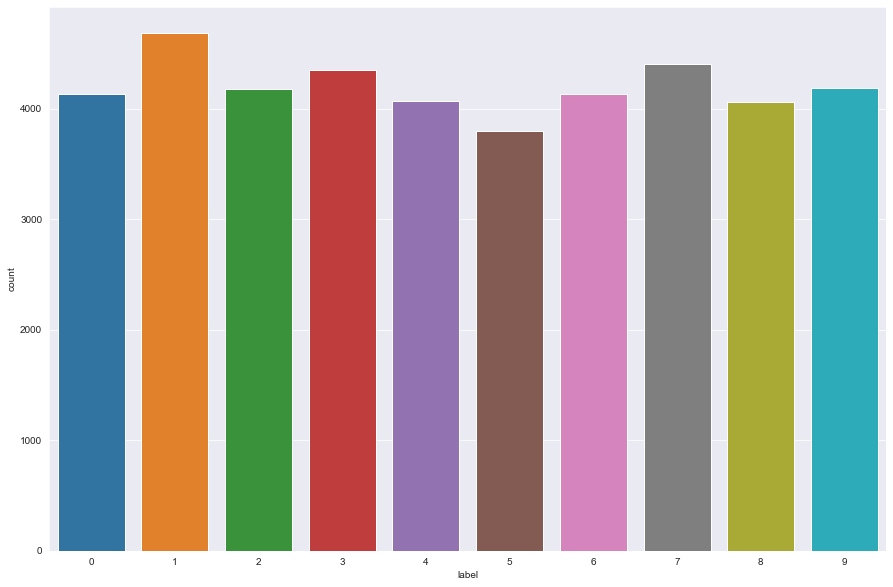

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
sns.countplot(x="label",data=df)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.05, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39900, 784)
(2100, 784)
(39900,)
(2100,)


In [9]:
X = X/255
test= test.values/255

In [10]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
# canal = 1 => For gray scale
X = X.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)

In [11]:
# we encode labels to one hot vectors (like [0,0,1,0,0,0,0,0,0,0])
from keras.utils.np_utils import to_categorical
y = to_categorical(y)

print(f"Label size {y.shape}")

Label size (42000, 10)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.05, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39900, 28, 28, 1)
(2100, 28, 28, 1)
(39900, 10)
(2100, 10)


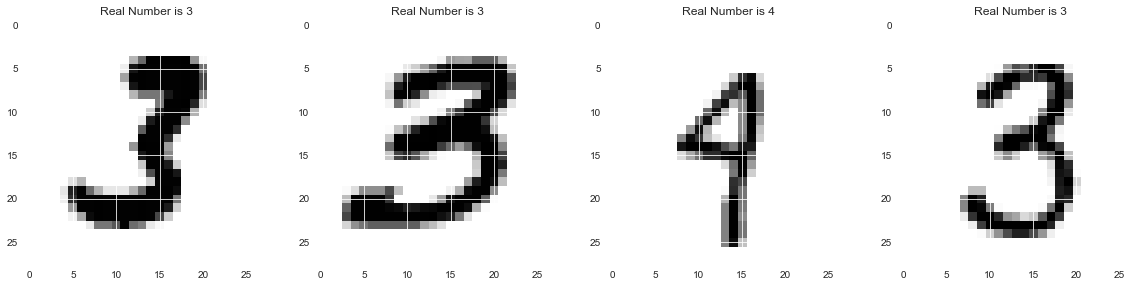

In [13]:
X_visualization = X_train.reshape(X_train.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_visualization[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}");
# we see how our data look like.

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,  ReduceLROnPlateau
cnn=Sequential()

#model.add(Lambda(standardize,input_shape=(28,28,1)))    
cnn.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
cnn.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(BatchNormalization())
cnn.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
cnn.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(BatchNormalization())    
cnn.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
cnn.add(MaxPooling2D(pool_size=(2,2)))
    
cnn.add(Flatten())
cnn.add(BatchNormalization())
cnn.add(Dense(512,activation="relu"))
    
cnn.add(Dense(10,activation="softmax"))
    
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
# With data augmentation to prevent overfitting
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


#datagen.fit(X_train)
train_generator = datagen.flow(X_train, y_train, batch_size=32)
test_generator = datagen.flow(X_test, y_test, batch_size=32)

In [16]:
# Fit the model
history = cnn.fit(train_generator, 
                  epochs = 10,
                  steps_per_epoch = X_train.shape[0] // 32,
                  validation_steps = X_test.shape[0] // 32,
                  validation_data = test_generator)

Epoch 1/10
1246/1246 [==============================] - 40s 32ms/step - loss: 0.1620 - accuracy: 0.9501 - val_loss: 0.1110 - val_accuracy: 0.9678
Epoch 2/10
1246/1246 [==============================] - 39s 32ms/step - loss: 0.0859 - accuracy: 0.9752 - val_loss: 0.0565 - val_accuracy: 0.9851
Epoch 3/10
1246/1246 [==============================] - 39s 32ms/step - loss: 0.0657 - accuracy: 0.9809 - val_loss: 0.0571 - val_accuracy: 0.9837
Epoch 4/10
1246/1246 [==============================] - 39s 32ms/step - loss: 0.0558 - accuracy: 0.9837 - val_loss: 0.0499 - val_accuracy: 0.9846
Epoch 5/10
1246/1246 [==============================] - 39s 31ms/step - loss: 0.0542 - accuracy: 0.9833 - val_loss: 0.0549 - val_accuracy: 0.9827
Epoch 6/10
1246/1246 [==============================] - 39s 32ms/step - loss: 0.0453 - accuracy: 0.9862 - val_loss: 0.0470 - val_accuracy: 0.9846
Epoch 7/10
1246/1246 [==============================] - 40s 32ms/step - loss: 0.0425 - accuracy: 0.9870 - val_loss: 0.0445 -

<AxesSubplot:>

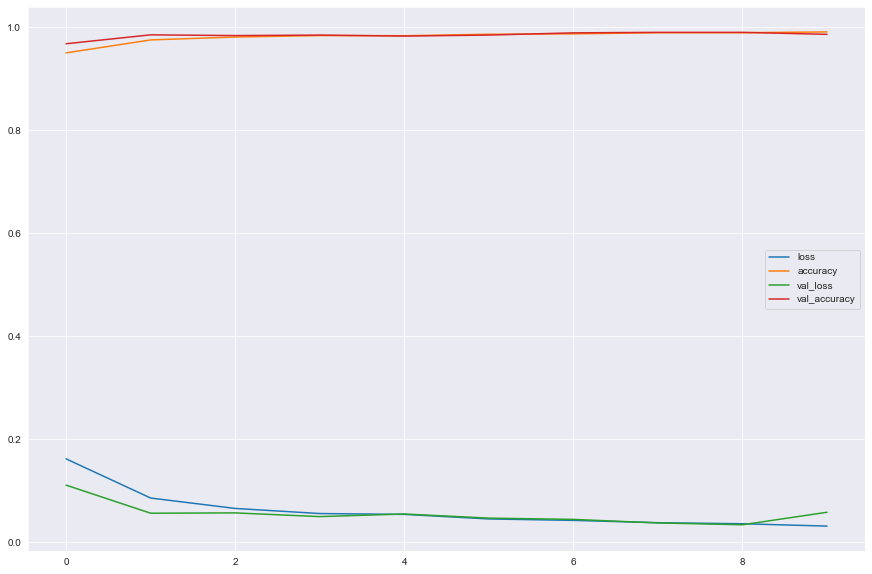

In [17]:
sns.set_style("darkgrid")
pd.DataFrame(cnn.history.history).plot(figsize=(15,10))

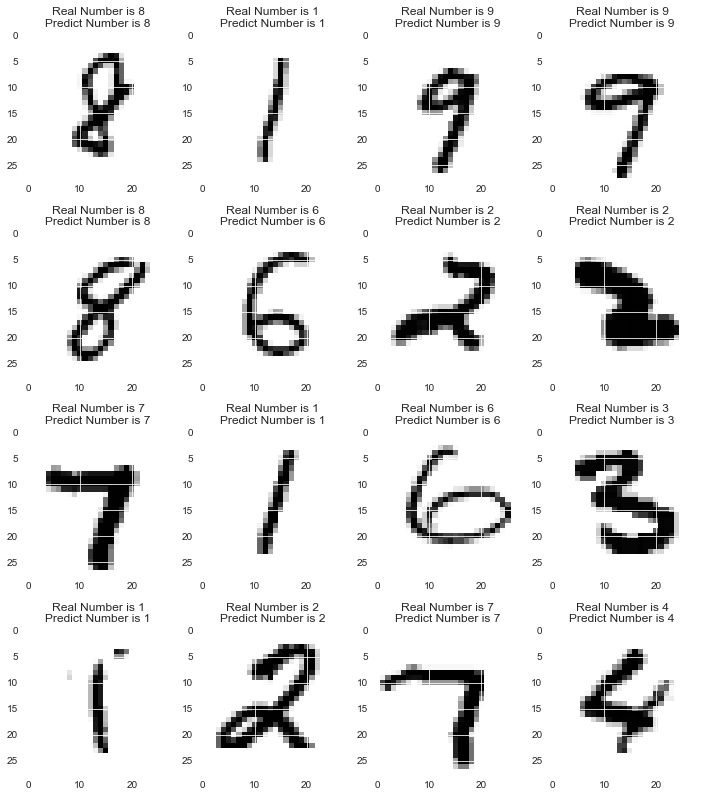

In [18]:
y_pred = cnn.predict(X_test)
X_new = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_new[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

In [19]:
predictions = cnn.predict(test, verbose=2)
predictions

875/875 - 6s


array([[3.1343465e-17, 1.5099554e-20, 1.0000000e+00, ..., 4.6640094e-14,
        6.3576171e-18, 1.1007041e-17],
       [9.9999988e-01, 3.3768359e-20, 6.4604158e-08, ..., 1.3828047e-11,
        1.4261501e-11, 1.1294965e-09],
       [1.9821646e-10, 2.4093474e-16, 6.7285386e-09, ..., 3.4146652e-10,
        1.4890270e-11, 1.0000000e+00],
       ...,
       [1.2171584e-28, 4.6619128e-28, 8.3888570e-21, ..., 2.7679496e-18,
        1.2456015e-25, 3.9329801e-20],
       [2.3611971e-10, 3.0283659e-16, 4.6405715e-10, ..., 1.1704084e-09,
        2.8738394e-13, 9.9999917e-01],
       [3.0857892e-24, 9.5148678e-33, 1.0000000e+00, ..., 4.6412198e-22,
        5.4640766e-25, 4.5161836e-23]], dtype=float32)